Benzerlik Matrisi:
[[1.   0.64 0.49 0.41 0.7  0.23]
 [0.64 1.   0.81 0.69 0.33 0.39]
 [0.49 0.81 1.   0.51 0.16 0.33]
 [0.41 0.69 0.51 1.   0.57 0.42]
 [0.7  0.33 0.16 0.57 1.   0.19]
 [0.23 0.39 0.33 0.42 0.19 1.  ]]


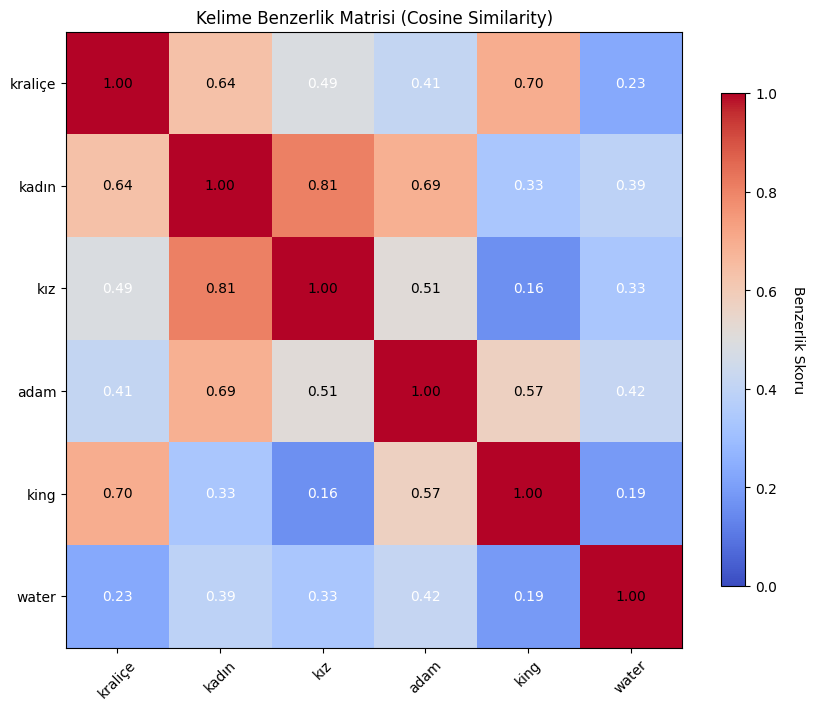

In [4]:
# !pip install -U sentence-transformers matplotlib numpy scikit-learn

from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

words = ["queen", "kadın", "kız", "adam", "king", "su"]

embeddings = model.encode(words)

# Benzerlik matrisini hesapla (cosine similarity)
similarity_matrix = cosine_similarity(embeddings)

# Benzerlik matrisini yazdır
print("Benzerlik Matrisi:")
print(np.round(similarity_matrix, 2))  # 2 ondalık basamakla yuvarla

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(similarity_matrix, cmap="coolwarm", vmin=0, vmax=1)

cbar = plt.colorbar(heatmap, shrink=0.8)
cbar.set_label('Benzerlik Skoru', rotation=270, labelpad=20)
plt.xticks(np.arange(len(words)), words, rotation=45)
plt.yticks(np.arange(len(words)), words)
plt.title("Kelime Benzerlik Matrisi (Cosine Similarity)")

# Hücrelere değerleri yaz
for i in range(len(words)):
    for j in range(len(words)):
        plt.text(j, i, f"{similarity_matrix[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if similarity_matrix[i, j] < 0.5 else "black")



Benzerlik Matrisi:
[[1.   0.51 0.42 0.19 0.34 0.69 0.26]
 [0.51 1.   0.68 0.27 0.43 0.17 0.31]
 [0.42 0.68 1.   0.46 0.37 0.12 0.33]
 [0.19 0.27 0.46 1.   0.6  0.33 0.31]
 [0.34 0.43 0.37 0.6  1.   0.53 0.42]
 [0.69 0.17 0.12 0.33 0.53 1.   0.19]
 [0.26 0.31 0.33 0.31 0.42 0.19 1.  ]]


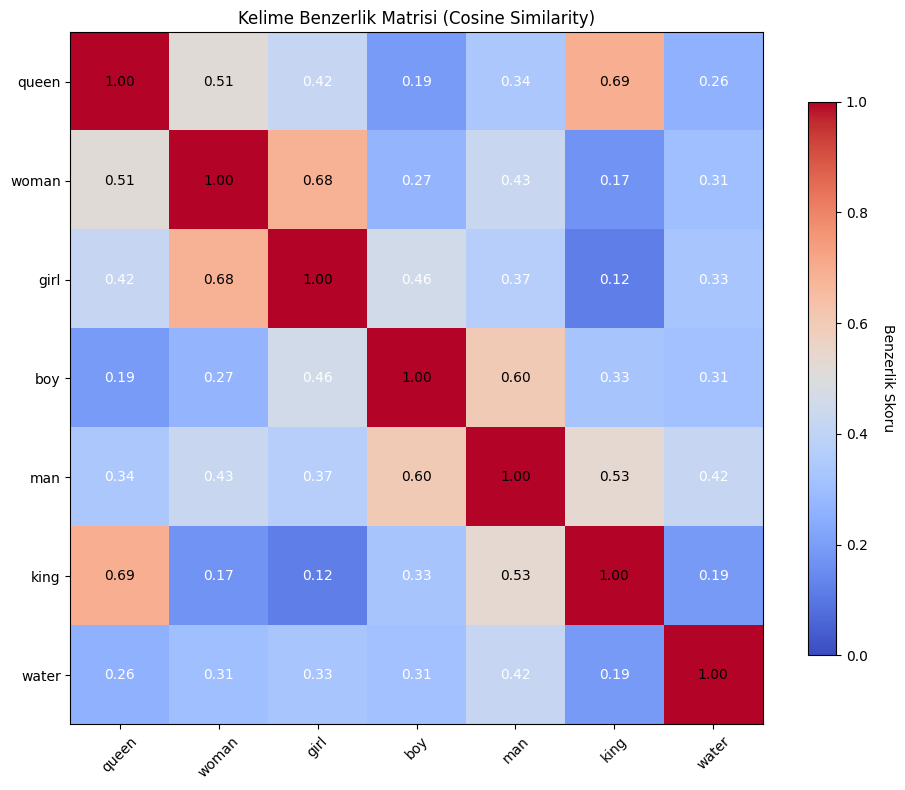

In [ ]:
# !pip install -U sentence-transformers matplotlib numpy scikit-learn

from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Modeli yükle
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# Kelimeler
words = ["queen", "woman", "girl", "boy", "man", "king", "water"]

# Embedding'leri oluştur
embeddings = model.encode(words)

# Benzerlik matrisini hesapla (cosine similarity)
similarity_matrix = cosine_similarity(embeddings)

# Benzerlik matrisini yazdır
print("Benzerlik Matrisi:")
print(np.round(similarity_matrix, 2))  # 2 ondalık basamakla yuvarla

# Heatmap oluştur
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(similarity_matrix, cmap="coolwarm", vmin=0, vmax=1)

# Renk skalasını ekle
cbar = plt.colorbar(heatmap, shrink=0.8)
cbar.set_label('Benzerlik Skoru', rotation=270, labelpad=20)

# Eksen etiketlerini ayarla
plt.xticks(np.arange(len(words)), words, rotation=45)
plt.yticks(np.arange(len(words)), words)
plt.title("Kelime Benzerlik Matrisi (Cosine Similarity)")

# Hücrelere değerleri yaz
for i in range(len(words)):
    for j in range(len(words)):
        plt.text(j, i, f"{similarity_matrix[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if similarity_matrix[i, j] < 0.5 else "black")

plt.tight_layout()
plt.show()

In [ ]:

# kelimelerin indeksini bul
king_index = words.index("king")
man_index = words.index("man")
woman_index = words.index("woman")
queen_index = words.index("queen")

# kelimelerin embedding vektörünü al
man_embedding = embeddings[man_index]
woman_embedding = embeddings[woman_index]
king_embedding = embeddings[king_index]
queen_embedding = embeddings[queen_index]


guess_queen_embedding = king_embedding - man_embedding + woman_embedding

# Embedding vektörünü yazdır
# print(guess_queen_embedding)
# print(queen_embedding)


from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity hesapla (reshape yaparak 2D hale getiriyoruz, benzerlik formülü: (A • B) / (||A|| * ||B||))
similarity = cosine_similarity(
    guess_queen_embedding.reshape(1, -1),  # (1, 384)
    queen_embedding.reshape(1, -1)         # (1, 384)
)

print(f"Tahmini queen vektörü ile gerçek queen vektörü arasındaki benzerlik: {similarity[0][0]:.4f}")

Tahmini queen vektörü ile gerçek queen vektörü arasındaki benzerlik: 0.7900


In [2]:
# !pip install -U sentence-transformers numpy scikit-learn

from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('all-MiniLM-L6-v2')

words = ["king", "man", "woman", "queen", "girl", "boy", "water"]

# Embedding'leri oluştur
embeddings = model.encode(words)

king_index = words.index("king")
man_index = words.index("man")
woman_index = words.index("woman")
queen_index = words.index("queen")

man_embedding = embeddings[man_index]
woman_embedding = embeddings[woman_index]
king_embedding = embeddings[king_index]
queen_embedding = embeddings[queen_index]

# "king - man + woman" vektör analojisini uygula
guess_queen_embedding = king_embedding - man_embedding + woman_embedding

# Cosine benzerliğini hesapla
similarity = cosine_similarity(
    guess_queen_embedding.reshape(1, -1),
    queen_embedding.reshape(1, -1)
)[0][0]

print("Tahmini Queen vektörü ile gerçek Queen vektörü arasındaki benzerlik:")
print(f"Cosine Similarity: {similarity:.4f}")

# Ek bilgiler
print("\nEmbedding boyutu:", len(king_embedding))  # 384 boyutlu çıktı verecek
print("Kullanılan model: all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Tahmini Queen vektörü ile gerçek Queen vektörü arasındaki benzerlik:
Cosine Similarity: 0.5795

Embedding boyutu: 384
Kullanılan model: all-MiniLM-L6-v2


Model indiriliyor...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model yüklendi!
Benzerlik Matrisi:
[[1.   0.32 0.35 0.17 0.65 0.02]
 [0.32 1.   0.75 0.77 0.13 0.1 ]
 [0.35 0.75 1.   0.59 0.17 0.12]
 [0.17 0.77 0.59 1.   0.23 0.07]
 [0.65 0.13 0.17 0.23 1.   0.04]
 [0.02 0.1  0.12 0.07 0.04 1.  ]]


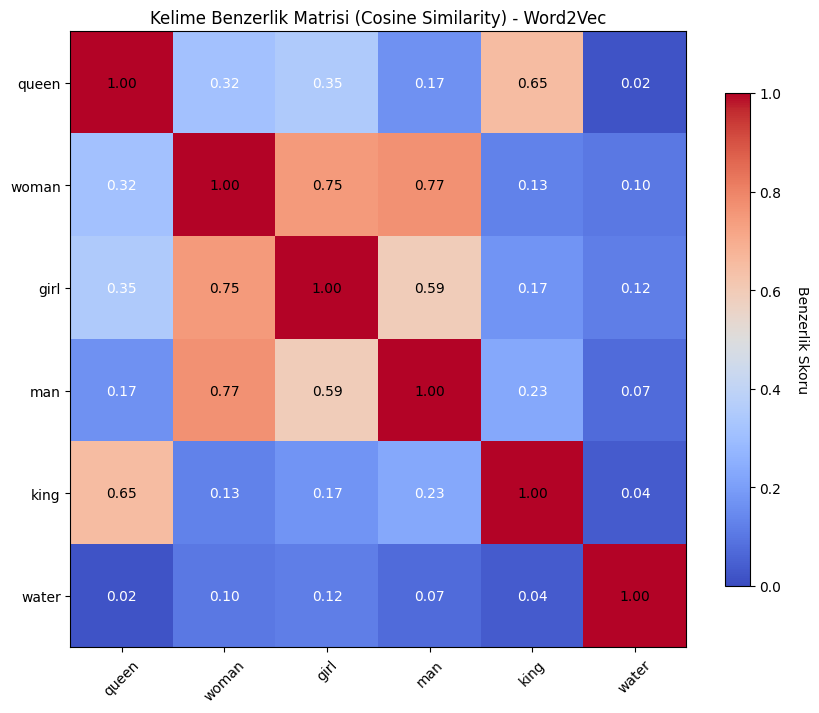

In [1]:
#!pip install gensim
# Gerekli kütüphaneler
#!pip install gensim matplotlib numpy scikit-learn

import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Önceden eğitilmiş Google News Word2Vec modelini yükle (300 boyut)
print("Model indiriliyor...")
model = api.load("word2vec-google-news-300")
print("Model yüklendi!")

# Kelimeler
words = ["queen", "woman", "girl", "man", "king", "water"]

# Word2Vec'ten embedding'leri al
embeddings = np.array([model[word] for word in words])

# Cosine similarity matrisi
similarity_matrix = cosine_similarity(embeddings)

# Benzerlik matrisini yazdır
print("Benzerlik Matrisi:")
print(np.round(similarity_matrix, 2))

# Heatmap
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(similarity_matrix, cmap="coolwarm", vmin=0, vmax=1)

# Renk skalası
cbar = plt.colorbar(heatmap, shrink=0.8)
cbar.set_label('Benzerlik Skoru', rotation=270, labelpad=20)

# Etiketler
plt.xticks(np.arange(len(words)), words, rotation=45)
plt.yticks(np.arange(len(words)), words)
plt.title("Kelime Benzerlik Matrisi (Cosine Similarity) - Word2Vec")

# Hücrelere değerleri yaz
for i in range(len(words)):
    for j in range(len(words)):
        plt.text(j, i, f"{similarity_matrix[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if similarity_matrix[i, j] < 0.5 else "black")

plt.show()


In [ ]:
# Google'ın eğitilmiş Word2Vec modelini yükle
model = api.load('word2vec-google-news-300')  # 300 boyutlu vektörler

# Kelime vektörlerini al
try:
    king = model['king']
    man = model['man']
    woman = model['woman']
    queen = model['queen']

    # Analojiyi uygula: king - man + woman
    predicted_queen = king - man + woman

    # Benzerlik hesapla
    similarity = cosine_similarity([predicted_queen], [queen])[0][0]

    print(f"Tahmini Queen vektörü ile gerçek Queen arasındaki benzerlik: {similarity:.4f}")

except KeyError as e:
    print(f"Hata: {e} kelimesi modelin sözlüğünde yok")

In [1]:
#!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer
import numpy as np

# Embedding modelini yükle (multilingual bir model seçiyoruz)
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# Türkçe cümleler
turkish_sentences = [
    "Bugün hava çok güzel",
    "Hava şuanda harika",
    "Köpek çimde koşuyor"
]

# İngilizce cümleler
english_sentences = [
    "The weather is very nice today",
    "The weather is amazing right now",
    "The dog is running on the grass"
]

# Cümleleri vektörlere dönüştür
turkish_embeddings = model.encode(turkish_sentences)
english_embeddings = model.encode(english_sentences)

# Sonuçları yazdır
print("Embedding Boyutu:", len(turkish_embeddings[0]))
print("\n")

print("Türkçe Cümleler ve Embeddingler:")
for sent, embed in zip(turkish_sentences, turkish_embeddings):
    print(f"Cümle: {sent}")
    print(f"Embedding (ilk 5 değer): {embed[:5]}...")
    print(f"Embedding Şekli: {embed.shape}")
    print("\n")

print("İngilizce Cümleler ve Embeddingler:")
for sent, embed in zip(english_sentences, english_embeddings):
    print(f"Cümle: {sent}")
    print(f"Embedding (ilk 5 değer): {embed[:5]}...")
    print(f"Embedding Şekli: {embed.shape}")
    print("\n")

# Benzerlik hesaplama (opsiyonel)
from sklearn.metrics.pairwise import cosine_similarity

print("Benzerlik Matrisi (Türkçe):")
print(cosine_similarity(turkish_embeddings))

print("\nBenzerlik Matrisi (İngilizce):")
print(cosine_similarity(english_embeddings))

print("\nTürkçe-İngilizce Cümle Benzerlikleri:")
for i, turk_sent in enumerate(turkish_sentences):
    for j, eng_sent in enumerate(english_sentences):
        sim = cosine_similarity([turkish_embeddings[i]], [english_embeddings[j]])[0][0]
        print(f"'{turk_sent}' <-> '{eng_sent}': {sim:.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embedding Boyutu: 384


Türkçe Cümleler ve Embeddingler:
Cümle: Bugün hava çok güzel
Embedding (ilk 5 değer): [0.24759595 0.3300099  0.0547699  0.14622703 0.19023584]...
Embedding Şekli: (384,)


Cümle: Hava şuanda harika
Embedding (ilk 5 değer): [0.3453412  0.17373843 0.05364428 0.16222116 0.04701874]...
Embedding Şekli: (384,)


Cümle: Köpek çimde koşuyor
Embedding (ilk 5 değer): [ 0.3611983   0.11365453 -0.5743185  -0.00210423  0.43819457]...
Embedding Şekli: (384,)


İngilizce Cümleler ve Embeddingler:
Cümle: The weather is very nice today
Embedding (ilk 5 değer): [ 0.2952208   0.26773977 -0.02613743  0.0838321   0.15282148]...
Embedding Şekli: (384,)


Cümle: The weather is amazing right now
Embedding (ilk 5 değer): [-0.00525856  0.12178001  0.10045684  0.27538767  0.4301791 ]...
Embedding Şekli: (384,)


Cümle: The dog is running on the grass
Embedding (ilk 5 değer): [ 0.27475315  0.18557929 -0.57220197 -0.00171682  0.41165882]...
Embedding Şekli: (384,)


Benzerlik Matrisi (Türk

In [ ]:
"""from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Modeli yükle (daha güçlü bir model deneyebilirsiniz)
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

words = ["king", "man", "woman", "queen", "girl", "boy", "water"]
embeddings = model.encode(words)

# Doğru indeksleri al
king_idx = words.index("king")
man_idx = words.index("man")
woman_idx = words.index("woman")
queen_idx = words.index("queen")

# Vektörleri çıkar
king_vec = embeddings[king_idx]
man_vec = embeddings[man_idx]
woman_vec = embeddings[woman_idx]
queen_vec = embeddings[queen_idx]

# "king - man + woman" hesapla
predicted_queen = king_vec - man_vec + woman_vec

# Cosine benzerliğini ölç
similarity = cosine_similarity(
    predicted_queen.reshape(1, -1),
    queen_vec.reshape(1, -1)
)[0][0]

print(f"Tahmini Queen vs Gerçek Queen Benzerliği: {similarity:.4f}")"""